In [53]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np
import pandas as pd

In [99]:
num_humans = [5, 7, 10, 15]
test_sizes = ['500', '999', '2500', '5000']
datasets = {'cifar10h':'cnn_data','imagenet':'imagenet_data'}
# datasets = {'imagenet':'imagenet_data'}
markers = ['s', 'D', '^']

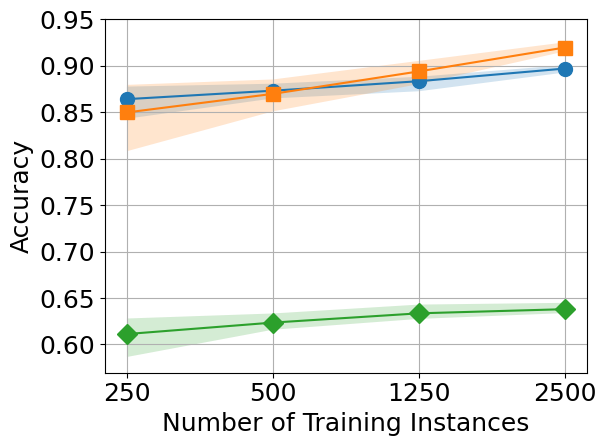

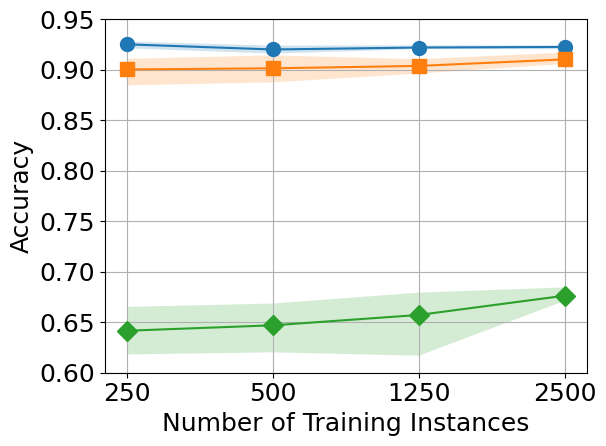

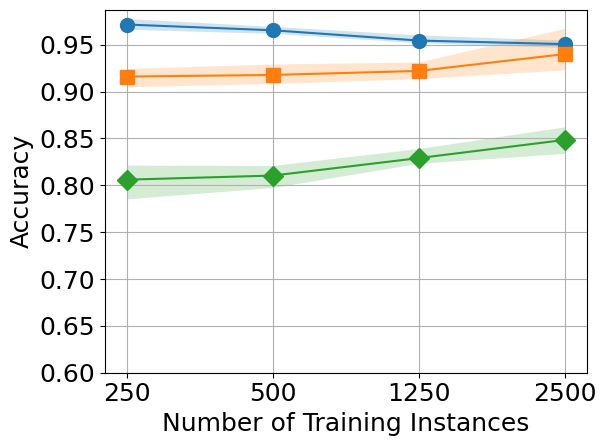

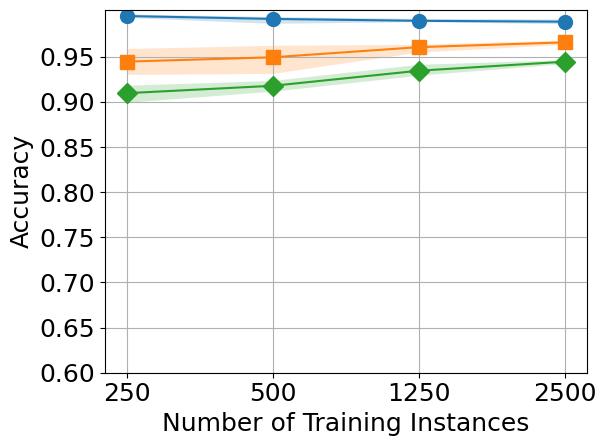

In [69]:
accuracy_data = []
for dataset,filename in datasets.items():
    for num_human in num_humans:
        avg_test_size_data = []
        min_test_size_data = []
        max_test_size_data = []
        labels = []
        test_sizes = ['500', '999', '2500', '5000']
        for test_size in test_sizes:
            data = pd.read_csv(f"{dataset}/accuracy/{num_human}_{filename}_accuracy_{test_size}.csv")
            labels = data.columns
            data = data[1:].to_numpy()
            avg_test_size_data.append(np.mean(data, axis=0))
            min_test_size_data.append(np.min(data, axis=0))
            max_test_size_data.append(np.max(data, axis=0))
        avg_test_size_data = np.transpose(np.array(avg_test_size_data))
        min_test_size_data = np.transpose(np.array(min_test_size_data))
        max_test_size_data = np.transpose(np.array(max_test_size_data))
        labels= labels[2:]
        avg_test_size_data = avg_test_size_data[2:]
        min_test_size_data = min_test_size_data[2:]
        max_test_size_data = max_test_size_data[2:]
        accuracy_data.append(avg_test_size_data)
        plt.figure()
        test_sizes = ['250', '500', '1250', '2500']
        for i in range(3):
            plt.plot(test_sizes, avg_test_size_data[i], label=labels[i], marker=markers[i], markersize=10)
            plt.fill_between(test_sizes, min_test_size_data[i], max_test_size_data[i], alpha=0.2)
        plt.xlabel('Number of Training Instances')
        plt.ylabel('Accuracy')
        plt.yticks(np.arange(0.6, 1.0, step=0.05))
        # plt.title(f'{dataset} {num_human} Humans')
        # plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'./plots/accuracy{num_human}_{dataset}.png')
        plt.show()
        plt.close()

In [73]:
algos = ['pseudo_lb', 'greedy', 'linear_program']
test_sizes = ['500', '999', '2500', '5000']
num_humans = [5, 7, 10, 15]
num_classes = {'cifar10h':10, 'imagenet':16}
markers = ['o', 's', 'D', '^', 'v']

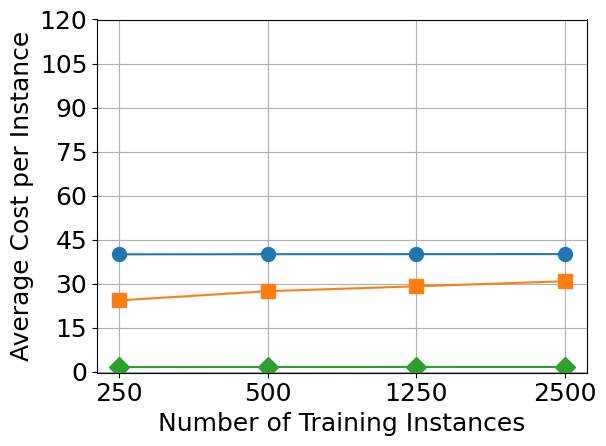

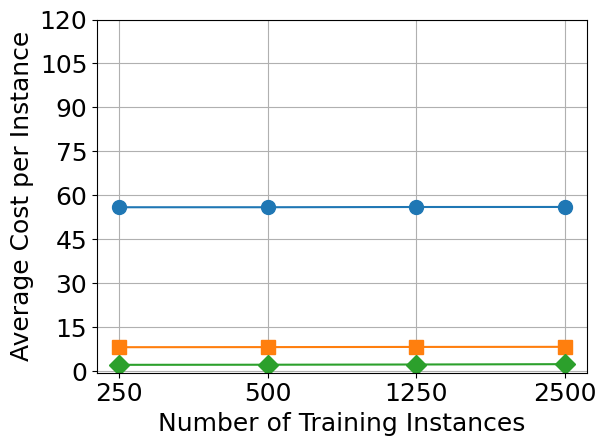

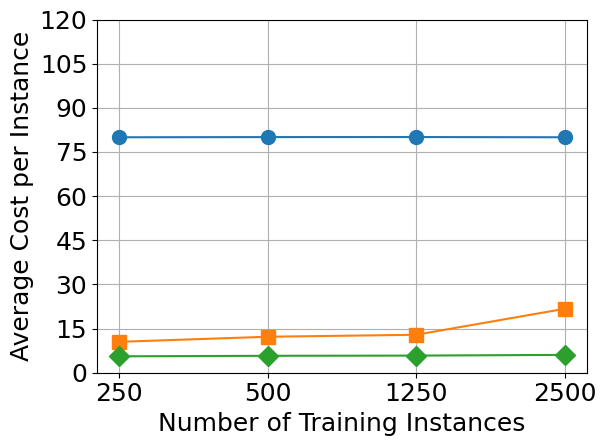

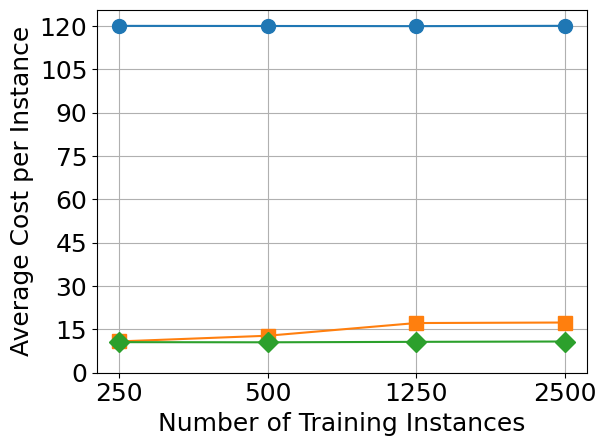

In [84]:
cost_data = []
for dataset in datasets.keys():
    for num_human in num_humans:
        algo_data = []
        for algo in algos:
            test_size_data = []
            test_sizes = ['500', '999', '2500', '5000']
            for test_size in test_sizes:
                data = pd.read_csv(f"{dataset}/subset_cost/{num_human}_{test_size}_{algo}.csv")
                data = np.mean(data.to_numpy(), axis=0)
                test_size_data.append(data[0])
            algo_data.append(test_size_data)
        cost_data.append(algo_data)
        plt.figure()
        test_sizes = ['250', '500', '1250', '2500']
        algo_names = ['Pseudo LB', 'PLACO Greedy', 'PLACO LP']
        for i in range(len(algo_data)):
            plt.plot(test_sizes, algo_data[i], label=algo_names[i], marker=markers[i], markersize=10)
        plt.xlabel('Number of Training Instances')
        plt.ylabel('Average Cost per Instance')
        plt.yticks(np.arange(0, 125, step=15))
        # plt.title(f'{dataset} {num_human} Humans')
        # plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'plots/cost{num_human}_{dataset}.png')
        plt.show()
        plt.close()

In [ ]:
for i in range(len(accuracy_data)):
    plt.figure()
    for j in range(3):
        plt.plot(test_sizes, accuracy_data[i][j]/cost_data[i][j], label=algos[j], marker=markers[j], markersize=8)
    plt.xlabel('Test Size')
    plt.ylabel('Accuracy Per Unit Cost')
    d_in = 0 if i < 4 else 1
    h_in = i if i < 4 else i%4
    plt.title(f'{list(datasets.keys())[d_in]} {num_humans[h_in]} Humans')
    plt.legend()
    plt.grid(True)
    plt.show()
    # plt.savefig(f'output/plots/accuracy_cost_{datasets[i%2]}_{num_humans[i//5]}_{algos[j-1]}.png')
    plt.close()

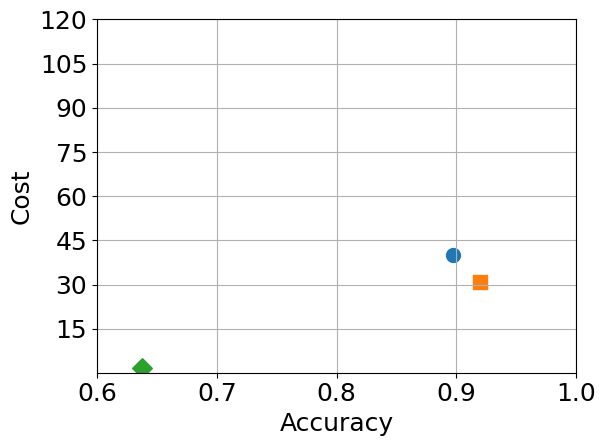

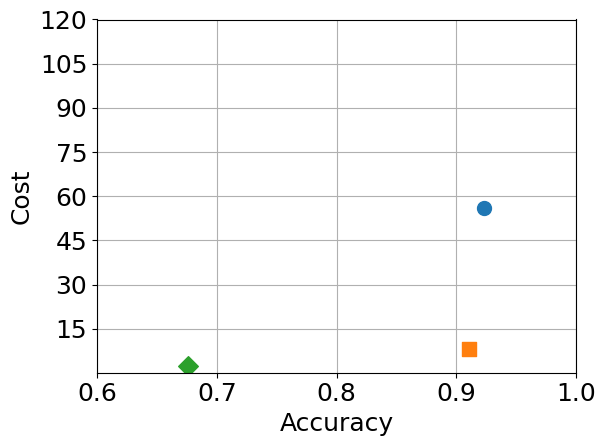

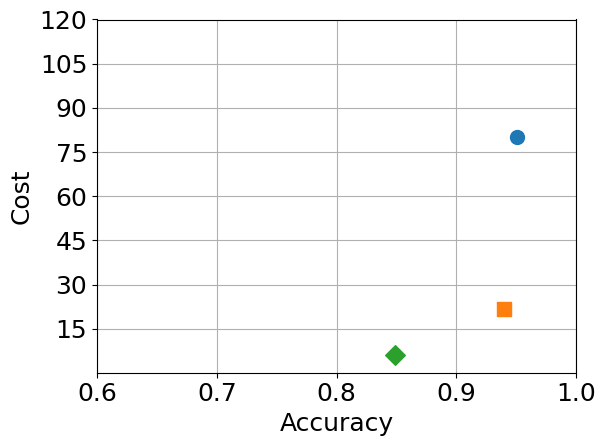

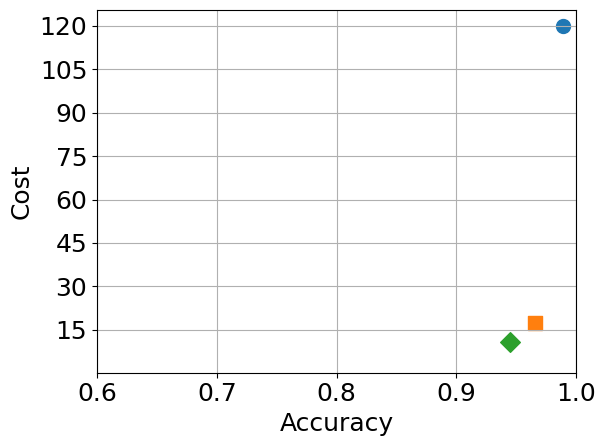

In [94]:
def distances_from_ideal(acc_list, cost_list):
    distances = [np.sqrt((1-acc)**2 + cost**2) for acc, cost in zip(acc_list, cost_list)]
    return distances

def points_from_ideal(acc_list, cost_list):
    points = [(acc, cost) for acc, cost in zip(acc_list, cost_list)]
    return points

for i in range(len(accuracy_data)):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for j in range(3):
        #plot points and the ideal point (1,0)
        point = points_from_ideal(accuracy_data[i][j], cost_data[i][j])[-1] # i decides a dataset and number of humans, j decides algorithm
        plt.scatter(point[0], point[1], marker=markers[j], label=algos[j], s=100)
    # plt.plot(1, 0, 'go')

    plt.xlabel('Accuracy')
    plt.ylabel('Cost')
    d_in = 0 if i < 4 else 1
    h_in = i if i < 4 else i%4
    # plt.title(f'{list(datasets.keys())[d_in]} {num_humans[h_in]} Humans')
    # plt.legend()
    plt.xticks(np.arange(0.6, 1.05, step=0.1))
    plt.yticks(np.arange(0, 125, step=15))
    plt.grid(True)
    plt.tight_layout()
    ax.set_ylim(0.1)
    plt.savefig(f'plots/acc_cost{list(datasets.keys())[d_in]}_{num_humans[h_in]}.png')
    plt.show()
    plt.close()

In [114]:
# Comparison of Estimation Methods
estimation_methods = ['maxmax', 'posterior', 'random', 'topk']
num_humans = ['5', '7', '10', '15']
markers = ['o', 's', 'D', '^']

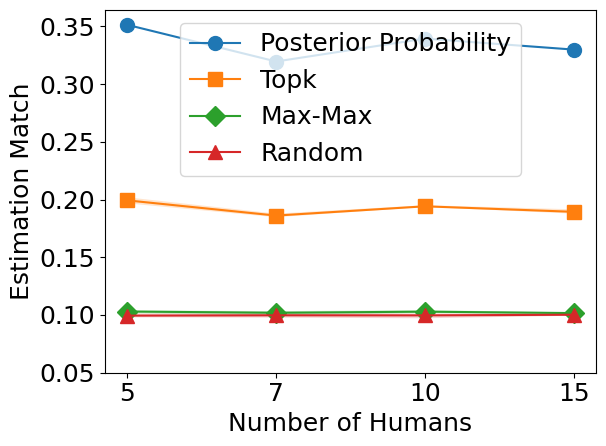

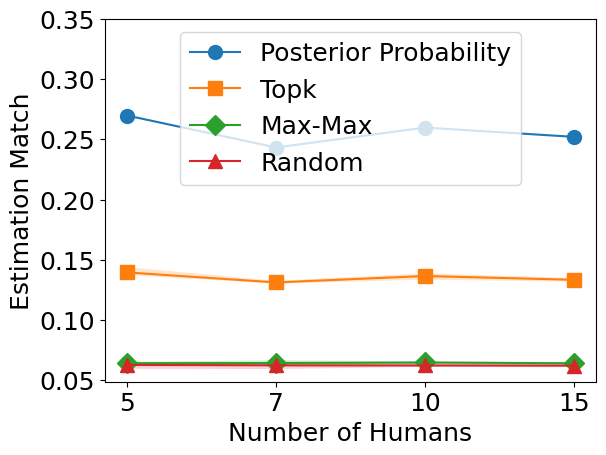

In [128]:
for dataset in datasets.keys():
    total_mean = []
    total_min = []
    total_max = []
    estimation_methods = ['posterior', 'topk', 'maxmax', 'random']
    for estimation in estimation_methods:
        est_mean = []
        est_min = []
        est_max = []
        for num_human in num_humans:
            data = pd.read_csv(f"{dataset}/estimation_match/{num_human}_5000_{estimation}.csv").to_numpy()
            est_mean.append(np.mean(data, axis=0))
            est_min.append(np.min(data, axis=0))
            est_max.append(np.max(data, axis=0))
        est_mean = [x[0] for x in est_mean]
        est_min = [x[0] for x in est_min]
        est_max = [x[0] for x in est_max]
        total_mean.append(est_mean)
        total_min.append(est_min)
        total_max.append(est_max)
    plt.figure()
    estimation_methods = ['Posterior Probability', 'Topk', 'Max-Max', 'Random', ]
    for i in range(len(estimation_methods)):
        plt.plot(num_humans, total_mean[i], label=estimation_methods[i], marker=markers[i], markersize=10)
        plt.fill_between(num_humans, total_min[i], total_max[i], alpha=0.2)
    plt.xlabel('Number of Humans')
    plt.ylabel('Estimation Match')
    plt.tight_layout()
    plt.legend()
    plt.yticks(np.arange(0.05, 0.40, step=0.05))
    plt.xticks(num_humans)
    plt.savefig(f'plots/estimation_match_{dataset}.png')
    plt.show()